In [1]:
#Installing necessary packages
!pip install -q tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 4.0 MB/s eta 0:00:00


In [2]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn.metrics import dtw
from random import randrange
from IPython.display import HTML
from base64 import b64encode

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading the CSV data file into a Pandas DataFrame and dropping the 'Unnamed: 0' column
data = pd .read_csv('/content/drive/MyDrive/rehab-ai-data/KiMoRe_final/KiMoRe_data_movenet.csv').drop('Unnamed: 0', axis=1)

In [6]:
# Function to display a video given its path using HTML and base64 encoding
def display_video(path):
  # Read the video file and encode it in base64
  mp4 = open(path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  # Return HTML code to display the video
  return HTML("""
  <video width=400 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url)

Chosen exercise for this experiment to find the threshold is Es2.

The most important joints in this exercise are the shoulders, elbows and wrists.

The chosen ground truth video is E_ID12 as it has the highest clinical score among all the experts with 50.


In [7]:
data[(data['exercise'] == 'Es2') & data['ID'].str.startswith('E')].sort_values(by='clinical_score', ascending=False)

,ID,exercise,video,joint_positions,clinical_score,#frames
339,E_ID12,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,49.666667,1204
381,E_ID7,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,48.666667,1008
316,E_ID11,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,47.333333,930
326,E_ID5,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,47.333333,527
376,E_ID1,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,45.000000,1667
386,E_ID9,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,44.666667,578
331,E_ID13,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,44.000000,731
361,E_ID3,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,44.000000,580
340,E_ID2,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,43.333333,730
372,E_ID6,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,41.000000,495


In [ ]:
# Displaying a video from the specified path
display_video('/content/drive/MyDrive/rehab-ai-data/KiMoRe_rgb_movenet/CG/Expert/E_ID12/Es2/rgb/Blur_rgb011214_105527.mp4')

In [9]:
# Reading reference data from a CSV file
reference = pd.read_csv('/content/drive/MyDrive/rehab-ai-data/KiMoRe_rgb_movenet/CG/Expert/E_ID12/Es2/E_ID12_Es2.csv')

# DTW between Ground Truth (GT) and the rest of the subjects

In [45]:
# Listing of body joints for DTW calculation
body_joints = [
    'left_shoulder',
    'right_shoulder',
    'left_elbow',
    'right_elbow',
    'left_wrist',
    'right_wrist',
    'left_hip',
    'right_hip',
    'left_knee',
    'right_knee',
]

In [46]:
# Function to calculate DTW values for a specific exercise type and return a dictionary
def dtwValues(stype):
  # Filtering subjects based on exercise type and extracting joint positions data
  subjects = data[(data['exercise'] == 'Es3') & data['ID'].str.startswith(stype)]['joint_positions']
  dict = {}

  for subject in subjects:
    # Skipping NaN values
    if type(subject) == float:
      continue
    id = subject.split('/')[8]
    s = pd.read_csv(subject)

    # Skipping the reference ID
    if id == 'E_ID12':
      continue

    # Initializing a list for each subject in the dictionary
    dict[id] = []

    # Calculating DTW values for each body joint and appending to the list
    for bj in body_joints:
      joints = [f'{bj}_x', f'{bj}_y']
      for j in joints:
        dtw_value = dtw(reference[j], s[j])
        dict[id].append(dtw_value)

  return dict

In [47]:
def plot_distribution(subjectsDTW, stype):
  # Extracting keys (IDs) and values (DTW lists) from the dictionary
  keys = list(subjectsDTW.keys())
  values = list(subjectsDTW.values())

  fig, axs = plt.subplots(2, 1, figsize=(8, 8))
  fig_title = f'DTW Distribution for the {stype} Participants'
  plt.suptitle(fig_title, fontsize=15)

  #Bar Plot
  plt.subplot(2, 1, 1)
  means = [np.mean(val) for val in values]
  sns.barplot(y=keys, x=means, capsize=5, orient='h', color='#0E899B')
  plt.xticks(np.arange(plt.xlim()[0], plt.xlim()[1]+0.5, 0.5))

  plt.xlabel('Mean DTW Values')
  plt.ylabel('Participant ID')
  plt.title(f'DTW Plot of Mean Values for Each {stype} Participant')
  plt.grid(True)

  #BoxPlot
  plt.subplot(2, 1, 2)
  data = pd.DataFrame({key: value for key, value in zip(keys, values)})
  sns.boxplot(data=data, orient='h', color='#0E899B')
  plt.xlabel('DTW Values')
  plt.ylabel('Participant ID')
  plt.title(f'Boxplot for the DTW Values for Each {stype} Participant')
  plt.grid(True)

  # Adjusting layout, saving and displaying plots
  plt.tight_layout()
  plt.savefig(f'/content/drive/MyDrive/rehab-ai-data/feedback_threshold_experiment_plots/{fig_title}.png', dpi=300)
  plt.show()

  # Displaying overall min, mean, and max of mean DTW values
  print(f"Min : {np.min(means)} \t Mean : {np.mean(means)} \t Max : {np.max(means)}")

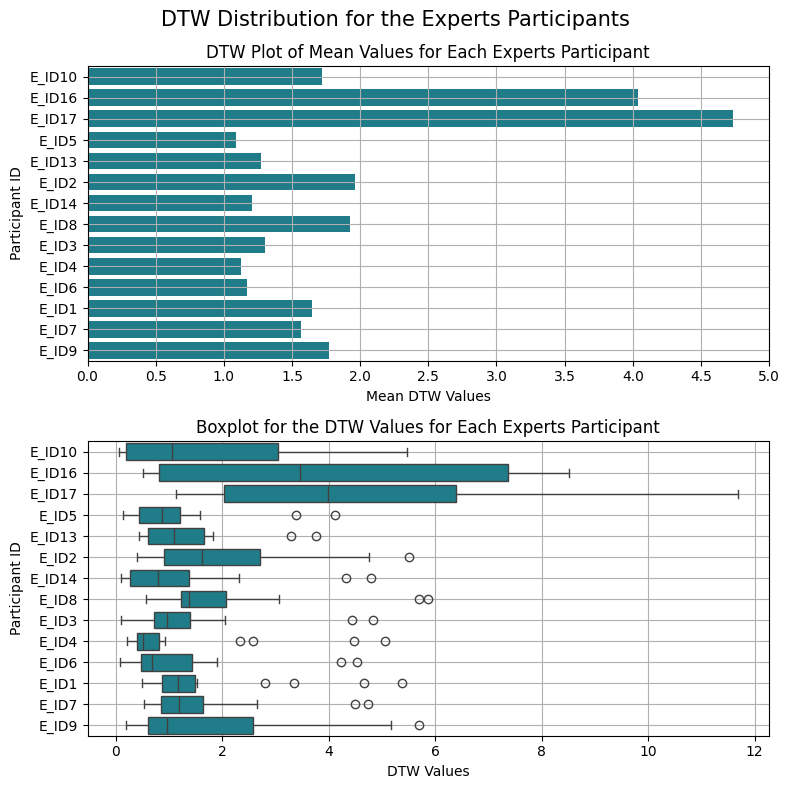

Min : 1.0876156318306074 	 Mean : 1.8949466278035199 	 Max : 4.738911301726162


In [48]:
# Calculating DTW values for category type 'Experts' and plotting the distribution
dtw_experts = dtwValues('E')
plot_distribution(dtw_experts, 'Experts')

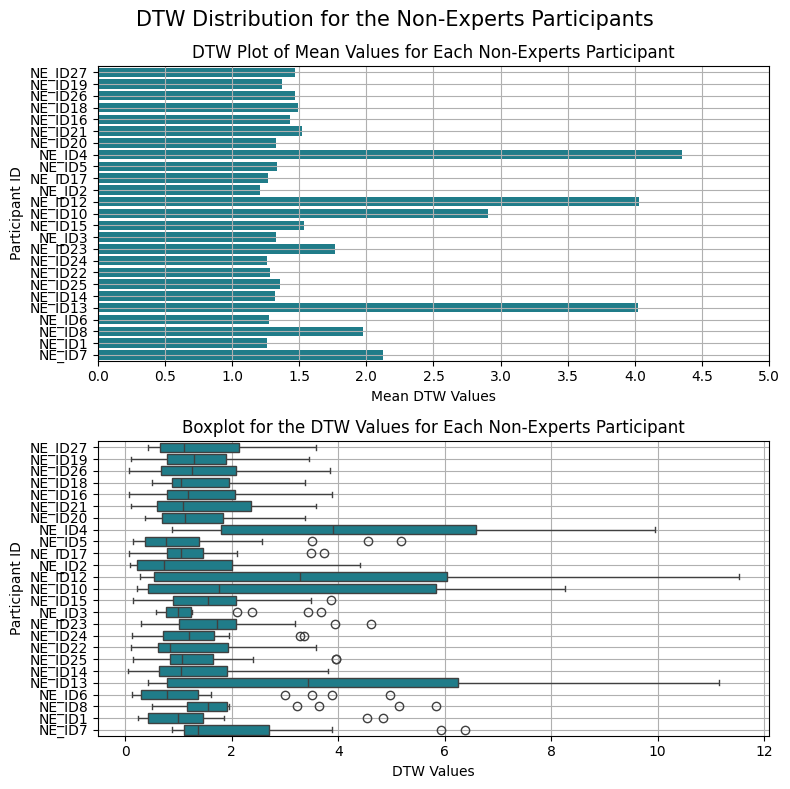

Min : 1.210568139862868 	 Mean : 1.82745603391779 	 Max : 4.354218381256271


In [49]:
# Calculating DTW values for category type 'Non Experts' and plotting the distribution
dtw_nonexperts = dtwValues('NE')
plot_distribution(dtw_nonexperts, 'Non-Experts')

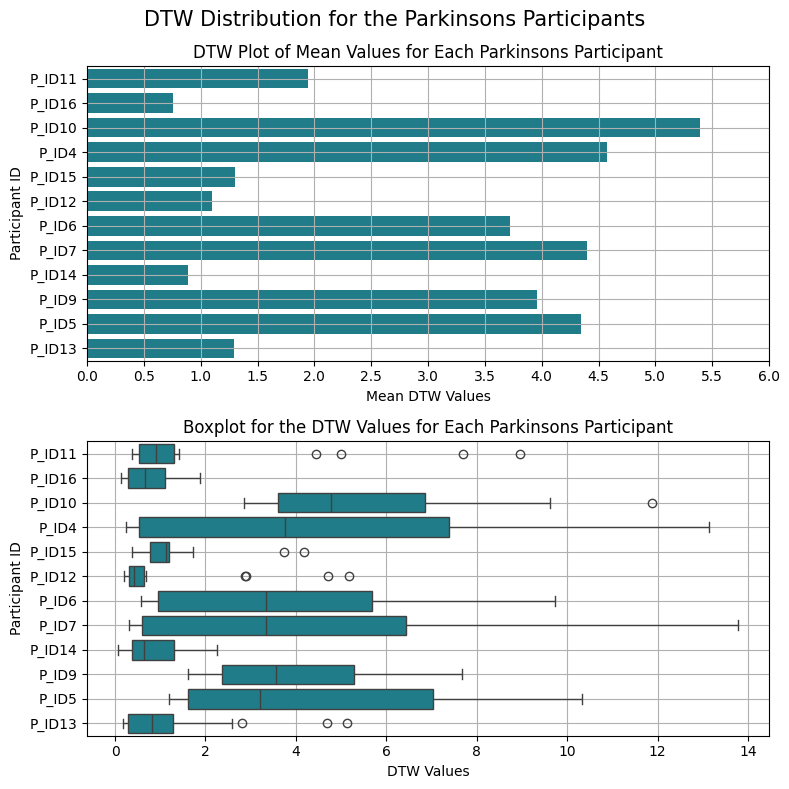

Min : 0.756489109445593 	 Mean : 2.8051603088580706 	 Max : 5.390732744649007


In [50]:
# Calculating DTW values for category type 'Parkinsons' and plotting the distribution
dtw_parks = dtwValues('P')
plot_distribution(dtw_parks, 'Parkinsons')

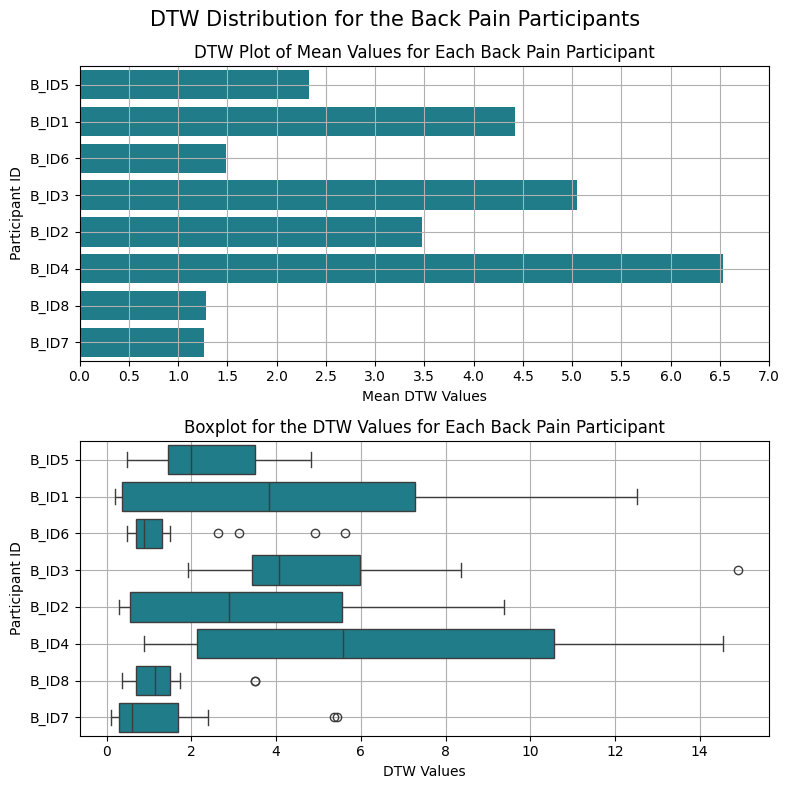

Min : 1.267425519529243 	 Mean : 3.2311645536181524 	 Max : 6.534216959274181


In [51]:
# Calculating DTW values for category type 'Back Pain' and plotting the distribution
dtw_backpain = dtwValues('B')
plot_distribution(dtw_backpain, 'Back Pain')

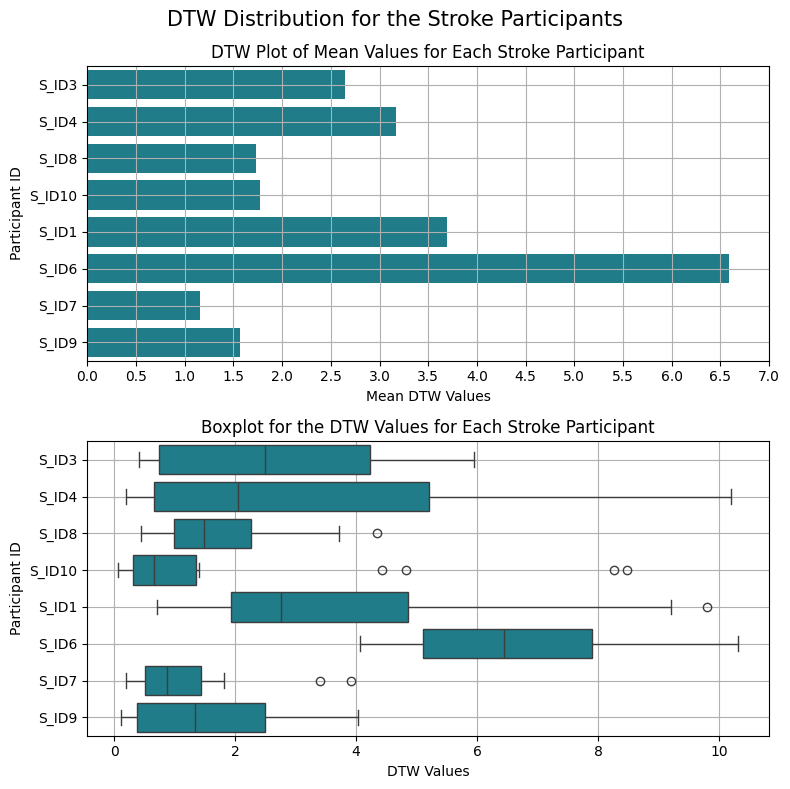

Min : 1.158901277629877 	 Mean : 2.7902030467155505 	 Max : 6.586070718775995


In [52]:
# Calculating DTW values for category type 'Stroke' and plotting the distribution
dtw_stroke = dtwValues('S')
plot_distribution(dtw_stroke, 'Stroke')

# DTW between GT and the rest of the subjects focusing only on the important joint for Exercise 2 with are the shoulders, elbow and wrist.

In [53]:
def dtwValues_focused(stype):
  # Filtering subjects based on exercise type and extracting joint positions data
  subjects = data[(data['exercise'] == 'Es3') & data['ID'].str.startswith(stype)]['joint_positions']
  dict = {}

  # Calculating DTW values for each important joint
  for subject in subjects:
    # Skipping NaN values
    if type(subject) == float:
      continue
    id = subject.split('/')[8]
    s = pd.read_csv(subject)

    # Skipping the reference ID
    if id == 'E_ID12':
      continue

    # Initializing a list for each subject in the dictionary
    dict[id] = []

    # Calculating DTW values for each important joint and appending to the list
    for bj in ['left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist']:
      joints = [f'{bj}_x', f'{bj}_y']

      for j in joints:
        dtw_value = dtw(reference[j], s[j])
        dict[id].append(dtw_value)

  return dict

In [54]:
def plot_distribution_focused(subjectsDTW, stype):
  keys = list(subjectsDTW.keys())
  values = list(subjectsDTW.values())

  fig, axs = plt.subplots(2, 1, figsize=(8, 8))
  fig_title = f'DTW Distribution for the {stype} Participants Focused on Important Joints'
  plt.suptitle(fig_title, fontsize=15)

  #Bar Plot
  plt.subplot(2, 1, 1)
  means = [np.mean(val) for val in values]
  sns.barplot(y=keys, x=means, capsize=5, orient='h', color='#0E899B')
  plt.xticks(np.arange(plt.xlim()[0], plt.xlim()[1]+0.5, 0.5))

  plt.xlabel('Mean DTW Values')
  plt.ylabel('Participant ID')
  plt.title(f'DTW Plot of Mean Values for Each {stype} Participant')
  plt.grid(True)

  #BoxPlot
  plt.subplot(2, 1, 2)
  data = pd.DataFrame({key: value for key, value in zip(keys, values)})
  sns.boxplot(data=data, orient='h', color='#0E899B')
  plt.xlabel('DTW Values')
  plt.ylabel('Participant ID')
  plt.title(f'Boxplot for the DTW Values for Each {stype} Participant')
  plt.grid(True)

  # Adjusting layout, saving and displaying plots
  plt.tight_layout()
  plt.savefig(f'/content/drive/MyDrive/rehab-ai-data/feedback_threshold_experiment_plots/{fig_title}.png', dpi=300)
  plt.show()

  # Displaying overall min, mean, and max of max DTW values
  print(f"Min : {np.min(means)} \t Mean : {np.mean(means)} \t Max : {np.max(means)}")

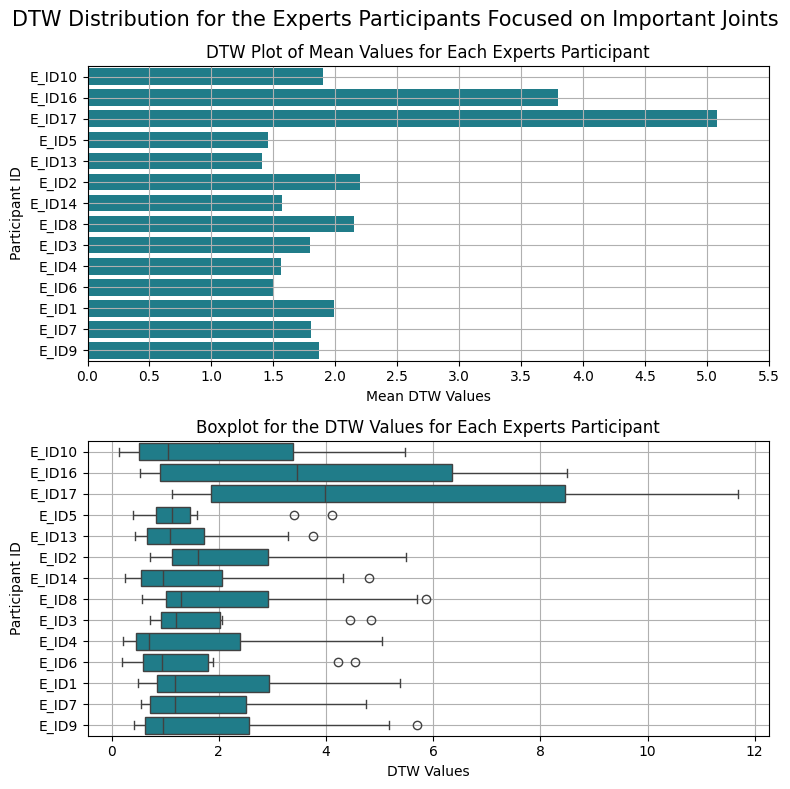

Min : 1.4117370408669274 	 Mean : 2.1489030412941728 	 Max : 5.082490178708435


In [55]:
# Calculating DTW values for 'Experts', focusing on important joints
dtw_experts = dtwValues_focused('E')
plot_distribution_focused(dtw_experts, 'Experts')

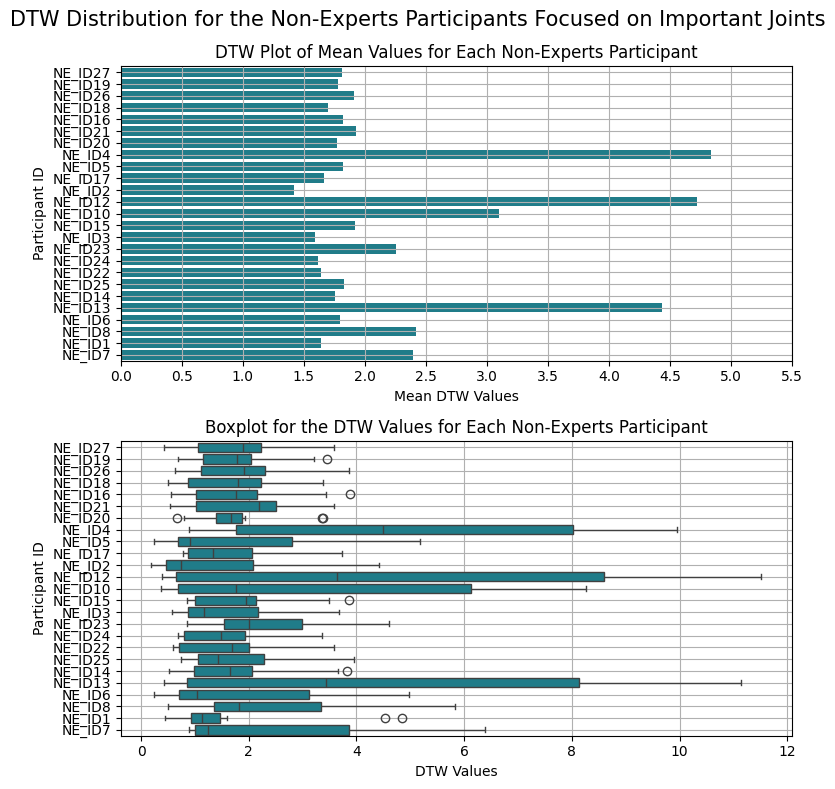

Min : 1.418758400136136 	 Mean : 2.224001645890464 	 Max : 4.834644134947021


In [56]:
# Calculating DTW values for 'Non Experts', focusing on important joints
dtw_nonexperts = dtwValues_focused('NE')
plot_distribution_focused(dtw_nonexperts, 'Non-Experts')

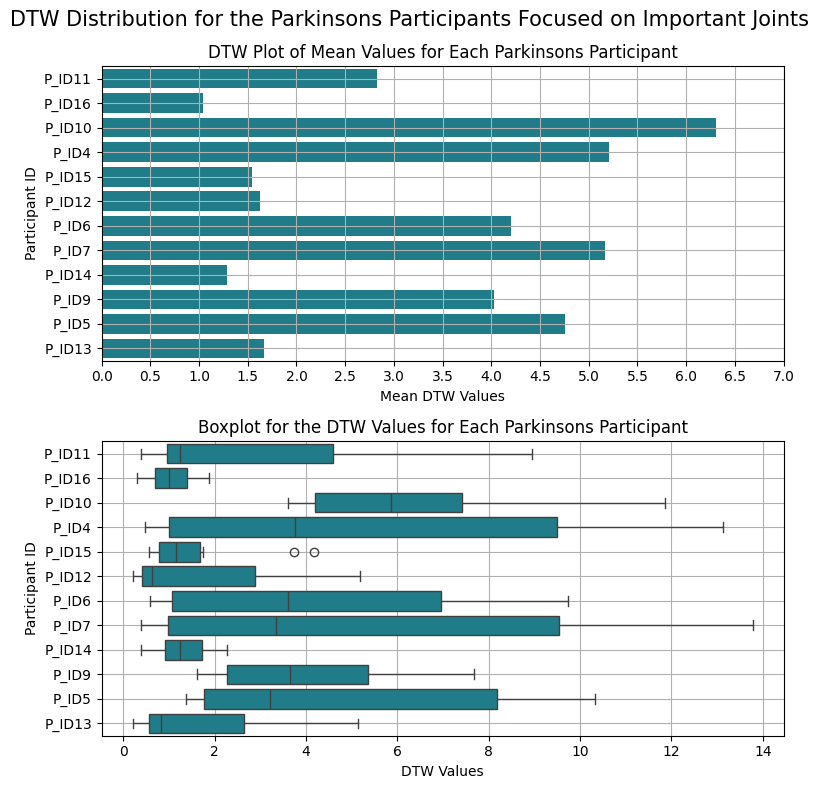

Min : 1.0403068992854836 	 Mean : 3.3049238183617025 	 Max : 6.305750917084272


In [57]:
# Calculating DTW values for 'Parkinsons', focusing on important joints
dtw_parks = dtwValues_focused('P')
plot_distribution_focused(dtw_parks, 'Parkinsons')

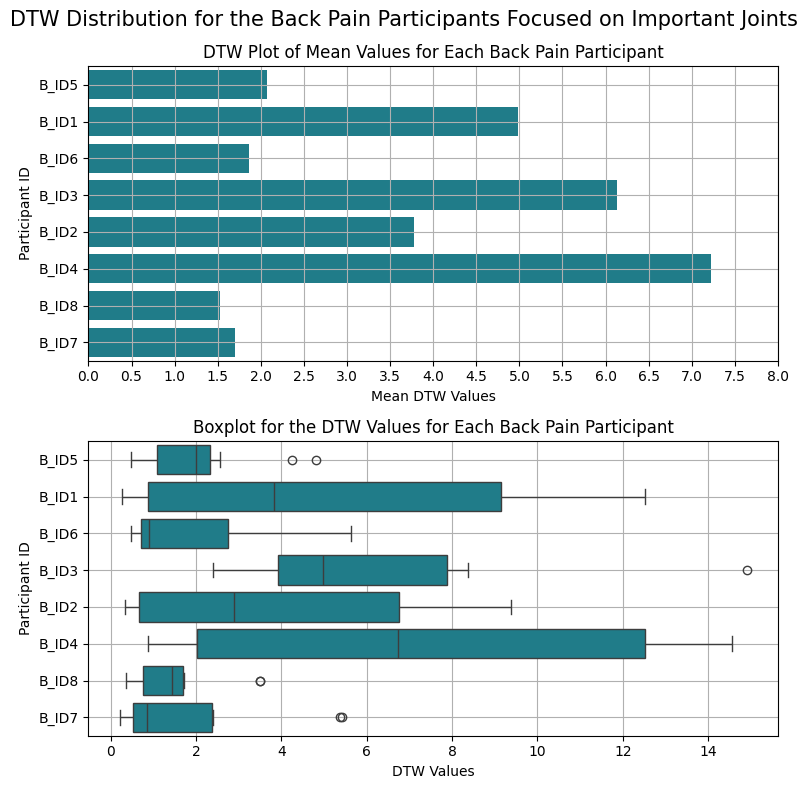

Min : 1.5246181525276923 	 Mean : 3.660784365892117 	 Max : 7.226739557431993


In [58]:
# Calculating DTW values for 'Back Pain', focusing on important joints
dtw_backpain = dtwValues_focused('B')
plot_distribution_focused(dtw_backpain, 'Back Pain')

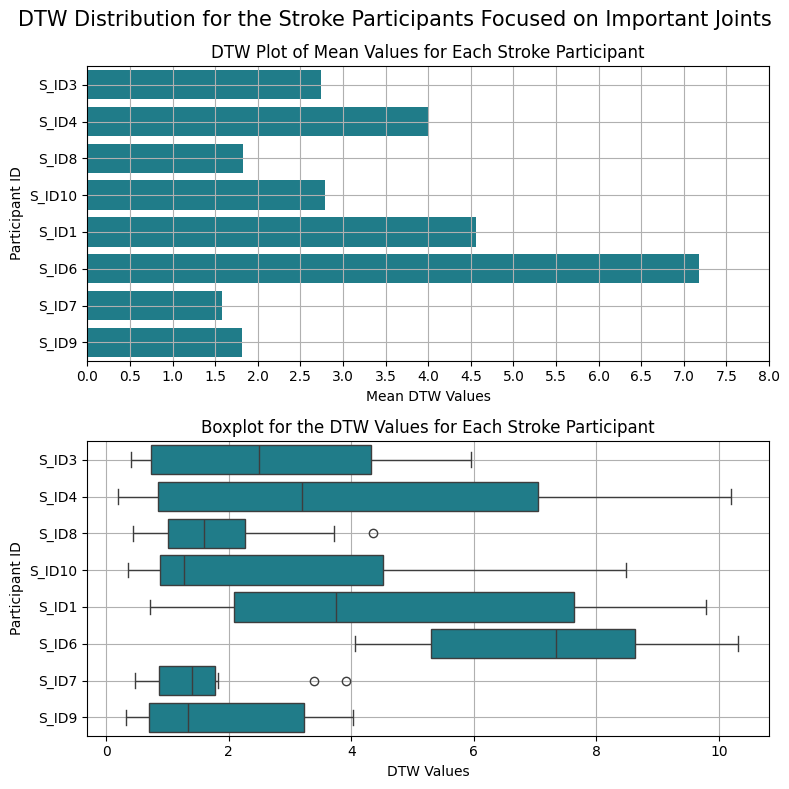

Min : 1.5848052518135682 	 Mean : 3.3127983489795403 	 Max : 7.1814298979316264


In [59]:
# Calculating DTW values for 'Stroke', focusing on important joints
dtw_stroke = dtwValues_focused('S')
plot_distribution_focused(dtw_stroke, 'Stroke')

# Testing the possible candidates for the threshold

####  [1.5 - 2.0 - 2.5 - 3.0]

In [60]:
# Selecting stroke patients from the dataset for exercise 'Es2', sorting them based on 'joint_positions', and setting 'ID' as the index
stroke_patients = data[(data['exercise'] == 'Es2') & data['ID'].str.startswith('S')].sort_values(by='joint_positions').set_index('ID')
stroke_patients

,exercise,video,joint_positions,clinical_score,#frames
ID,,,,,
S_ID1,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,20.000000,686
S_ID10,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,22.666667,690
S_ID3,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,20.000000,746
S_ID4,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,25.000000,1129
S_ID5,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,40.265368,843
S_ID6,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,24.779104,523
S_ID7,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,23.333333,949
S_ID8,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,25.333333,1262
S_ID9,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,17.666667,537


In [61]:
# Defineing a function to provide feedback based on DTW values
def feedback(test,counter,reference,threshold):
  for bj in body_joints:
    joints = [f'{bj}_x', f'{bj}_y']
    for j in joints:
      dtwValue = dtw(test[j][:counter], reference[j][:counter])
      if dtwValue > threshold:
          axis = 'vertically' if j[-1:] == 'y' else 'horizontally'
          print(f'Adjust your {j.replace("_", " ")[:-2]} {axis}')

In [62]:
# Defining a function to test feedback for a specific ID
def test_feedback(id, test, reference, threshold):
  test_joints = pd.read_csv(test.loc[id,'joint_positions'])
  test_frames = test.loc[id,'#frames']

  print(f'The selected ID: {id}')

  for count in range(1,test_frames+1):
    if count % 30 == 0:
      print(f' {count} \t\t {feedback(test_joints, count, reference, threshold)}')

## 1. First subject - S_ID7
This stroke patient had a clinical score of 23.3

It doesnot appear that this patient needs any feedback as they are performing the set exercise correctly as they possibly can considering their condition.

In [ ]:
display_video('/content/drive/MyDrive/rehab-ai-data/KiMoRe_rgb_movenet/GPP/Stroke/S_ID7/Es2/rgb/Blur_rgb271114_112849.mp4')

In [64]:
test_feedback('S_ID7',stroke_patients,reference,1.5)

The selected ID: S_ID7
 30 		 None
 60 		 None
 90 		 None
 120 		 None
 150 		 None
 180 		 None
 210 		 None
 240 		 None
 270 		 None
 300 		 None
 330 		 None
 360 		 None
 390 		 None
 420 		 None
 450 		 None
 480 		 None
 510 		 None
 540 		 None
Adjust your left wrist vertically
 570 		 None
 600 		 None
 630 		 None
Adjust your left wrist vertically
 660 		 None
Adjust your left wrist vertically
 690 		 None
Adjust your left wrist vertically
 720 		 None
Adjust your left wrist vertically
 750 		 None
Adjust your left wrist vertically
 780 		 None
Adjust your left wrist vertically
 810 		 None
Adjust your left wrist vertically
 840 		 None
Adjust your left wrist vertically
 870 		 None
Adjust your left wrist vertically
 900 		 None
Adjust your left wrist vertically
 930 		 None


In [65]:
test_feedback('S_ID7',stroke_patients,reference,2)

The selected ID: S_ID7
 30 		 None
 60 		 None
 90 		 None
 120 		 None
 150 		 None
 180 		 None
 210 		 None
 240 		 None
 270 		 None
 300 		 None
 330 		 None
 360 		 None
 390 		 None
 420 		 None
 450 		 None
 480 		 None
 510 		 None
 540 		 None
 570 		 None
 600 		 None
 630 		 None
 660 		 None
 690 		 None
 720 		 None
 750 		 None
 780 		 None
Adjust your left wrist vertically
 810 		 None
 840 		 None
Adjust your left wrist vertically
 870 		 None
 900 		 None
Adjust your left wrist vertically
 930 		 None


In [66]:
test_feedback('S_ID7',stroke_patients,reference,2.5)

The selected ID: S_ID7
 30 		 None
 60 		 None
 90 		 None
 120 		 None
 150 		 None
 180 		 None
 210 		 None
 240 		 None
 270 		 None
 300 		 None
 330 		 None
 360 		 None
 390 		 None
 420 		 None
 450 		 None
 480 		 None
 510 		 None
 540 		 None
 570 		 None
 600 		 None
 630 		 None
 660 		 None
 690 		 None
 720 		 None
 750 		 None
 780 		 None
 810 		 None
 840 		 None
 870 		 None
 900 		 None
 930 		 None


In [67]:
test_feedback('S_ID7',stroke_patients,reference,3)

The selected ID: S_ID7
 30 		 None
 60 		 None
 90 		 None
 120 		 None
 150 		 None
 180 		 None
 210 		 None
 240 		 None
 270 		 None
 300 		 None
 330 		 None
 360 		 None
 390 		 None
 420 		 None
 450 		 None
 480 		 None
 510 		 None
 540 		 None
 570 		 None
 600 		 None
 630 		 None
 660 		 None
 690 		 None
 720 		 None
 750 		 None
 780 		 None
 810 		 None
 840 		 None
 870 		 None
 900 		 None
 930 		 None


## 2. Second subject - S_ID8

This stroke patient had a clinical score of 26.3

This patient performed the exercise correctly but had to be corrected through out their performance by the specialists available with them.

Our feedback model was able to capture those corrections.

In [ ]:
display_video('/content/drive/MyDrive/rehab-ai-data/KiMoRe_rgb_movenet/GPP/Stroke/S_ID8/Es2/rgb/Blur_rgb271114_113727.mp4')

In [69]:
test_feedback('S_ID8',stroke_patients,reference,1.5)

The selected ID: S_ID8
Adjust your left wrist vertically
Adjust your right wrist vertically
 30 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 60 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 90 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 120 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 150 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 180 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 210 		 None
Adjust your left wrist vertically
Adjust your right wrist horizontally
Adjust your right wrist vertically
 240 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
Adjust your right knee vertically
 270 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
Adjust your right knee vertically
 300 		 None
Adjust your left wrist vertically
Adjust your right wri

In [70]:
test_feedback('S_ID8',stroke_patients,reference,2)

The selected ID: S_ID8
Adjust your left wrist vertically
 30 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 60 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 90 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 120 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 150 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 180 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 210 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 240 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 270 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 300 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 330 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 360 		 None
Adjust your left wrist vertical

In [71]:
test_feedback('S_ID8',stroke_patients,reference,2.5)

The selected ID: S_ID8
 30 		 None
 60 		 None
 90 		 None
 120 		 None
 150 		 None
 180 		 None
Adjust your left wrist vertically
 210 		 None
Adjust your left wrist vertically
 240 		 None
 270 		 None
 300 		 None
 330 		 None
Adjust your left wrist vertically
 360 		 None
Adjust your left wrist vertically
 390 		 None
 420 		 None
Adjust your right wrist vertically
 450 		 None
 480 		 None
 510 		 None
Adjust your left wrist vertically
 540 		 None
 570 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 600 		 None
Adjust your left wrist vertically
 630 		 None
Adjust your left wrist vertically
 660 		 None
Adjust your left wrist vertically
 690 		 None
Adjust your left wrist vertically
 720 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
Adjust your right knee vertically
 750 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
Adjust your right knee vertically
 780 		 None
Adjust your left wrist ver

In [72]:
test_feedback('S_ID8',stroke_patients,reference,3)

The selected ID: S_ID8
 30 		 None
 60 		 None
 90 		 None
 120 		 None
 150 		 None
 180 		 None
 210 		 None
 240 		 None
 270 		 None
 300 		 None
 330 		 None
 360 		 None
 390 		 None
 420 		 None
 450 		 None
 480 		 None
 510 		 None
 540 		 None
 570 		 None
 600 		 None
 630 		 None
 660 		 None
 690 		 None
 720 		 None
 750 		 None
 780 		 None
 810 		 None
 840 		 None
 870 		 None
 900 		 None
 930 		 None
 960 		 None
 990 		 None
 1020 		 None
 1050 		 None
Adjust your right knee vertically
 1080 		 None
Adjust your left wrist vertically
Adjust your right knee vertically
 1110 		 None
Adjust your right knee vertically
 1140 		 None
Adjust your right knee vertically
 1170 		 None
Adjust your left wrist vertically
Adjust your right knee vertically
 1200 		 None
Adjust your left wrist vertically
Adjust your right knee vertically
 1230 		 None
Adjust your right knee vertically
 1260 		 None


## 3. Third Subject - S_ID1

This stroke patient had a clinical score of 20.0

This patient appeared to not be doing the exercise correctly from the beginning but this is due to their condition, however they are still being provided with the feedback to facilitate the healing process.

In [ ]:
display_video('/content/drive/MyDrive/rehab-ai-data/KiMoRe_rgb_movenet/GPP/Stroke/S_ID1/Es2/rgb/Blur_rgb060616_122346.mp4')

In [74]:
test_feedback('S_ID1',stroke_patients,reference,1.5)

The selected ID: S_ID1
 30 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 60 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 90 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 120 		 None
Adjust your left shoulder vertically
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 150 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 180 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist ve

In [75]:
test_feedback('S_ID1',stroke_patients,reference,2)

The selected ID: S_ID1
 30 		 None
 60 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 90 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 120 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
 150 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 180 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 210 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 240 		 None
Adjust your left shoulder vertically
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your 

In [76]:
test_feedback('S_ID1',stroke_patients,reference,2.5)

The selected ID: S_ID1
 30 		 None
 60 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 90 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
 120 		 None
Adjust your left wrist vertically
 150 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
 180 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
 210 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
 240 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 270 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 300 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 330 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 360 		 None
Ad

In [77]:
test_feedback('S_ID1',stroke_patients,reference,3)

The selected ID: S_ID1
 30 		 None
 60 		 None
Adjust your left wrist vertically
 90 		 None
 120 		 None
 150 		 None
Adjust your left wrist vertically
 180 		 None
Adjust your left wrist vertically
 210 		 None
Adjust your left wrist vertically
 240 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
 270 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
 300 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
 330 		 None
Adjust your left elbow vertically
Adjust your left wrist vertically
 360 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 390 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 420 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your

# Chosen Threshold (T): 2.5

This threshold was chosen due to the following reasons:


1.   T 1.5 was exaggerating the feedback
2.   T 2 was good but exaggerated the feedback as well and does not put into perspective that the patient's capabilities do not allow them to perform the exercise as accurately as the expert.
3.   T 3 was not capturing any corrections at all

Therefore, T 2.5 was found to be a good balance.

--------------------------------------------------------------------------------------------------------------------------------

To further prove the capabilities of this threshold, a randomly selected id from the Parkinson's patients was selected and the threshold was tested on all the exercises.


In [89]:
# Randomly selecting an ID between 1 and 15
id = randrange(1,16)

# Filtering the DataFrame to get rows corresponding to the selected ID
final_test = data[data['ID'] == f'P_ID{id}'].set_index('ID')
final_test

,exercise,video,joint_positions,clinical_score,#frames
ID,,,,,
P_ID4,Es5,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,17.0,461
P_ID4,Es2,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,10.0,1005
P_ID4,Es3,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,10.0,562
P_ID4,Es1,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,14.0,842
P_ID4,Es4,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,/content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...,14.0,941


In [ ]:
#Es1
display_video(final_test[final_test['exercise'] == 'Es1'].loc[final_test.index[0], 'video'])

In [91]:
#Es1
gtEs1 = pd.read_csv('/content/drive/MyDrive/rehab-ai-data/KiMoRe_rgb_movenet/CG/Expert/E_ID15/Es1/E_ID15_Es1.csv')
test_feedback(final_test.index[0],final_test[final_test['exercise'] == 'Es1'],gtEs1,2.5)

The selected ID: P_ID4
 30 		 None
 60 		 None
 90 		 None
 120 		 None
 150 		 None
 180 		 None
 210 		 None
 240 		 None
 270 		 None
 300 		 None
 330 		 None
 360 		 None
 390 		 None
Adjust your right shoulder vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 420 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 450 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 480 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 510 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your right wrist vertically
 540 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left wrist

In [ ]:
#Es2
display_video(final_test[final_test['exercise'] == 'Es2'].loc[final_test.index[0], 'video'])

In [93]:
#Es2
gtEs2 = pd.read_csv('/content/drive/MyDrive/rehab-ai-data/KiMoRe_rgb_movenet/CG/Expert/E_ID12/Es2/E_ID12_Es2.csv')
test_feedback(final_test.index[0],final_test[final_test['exercise'] == 'Es2'],gtEs2,2.5)

The selected ID: P_ID4
 30 		 None
 60 		 None
 90 		 None
 120 		 None
 150 		 None
 180 		 None
 210 		 None
 240 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left elbow vertically
Adjust your left wrist vertically
 270 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
Adjust your left hip vertically
Adjust your right hip vertically
 300 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your left hip vertically
Adjust your right hip vertically
 330 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
Adjust your left hip verticall

In [ ]:
#Es3
display_video(final_test[final_test['exercise'] == 'Es3'].loc[final_test.index[0], 'video'])

In [95]:
#Es3
gtEs3 = pd.read_csv('/content/drive/MyDrive/rehab-ai-data/KiMoRe_rgb_movenet/CG/Expert/E_ID12/Es3/E_ID12_Es3.csv')
test_feedback(final_test.index[0],final_test[final_test['exercise'] == 'Es3'],gtEs3,2.5)

The selected ID: P_ID4
 30 		 None
 60 		 None
 90 		 None
 120 		 None
 150 		 None
Adjust your right wrist vertically
 180 		 None
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 210 		 None
Adjust your right shoulder vertically
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
Adjust your right knee vertically
 240 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
Adjust your left knee vertically
Adjust your right knee vertically
 270 		 None
Adjust your left shoulder vertically
Adjust your right shoulder vertically
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
Adjust your left knee

In [ ]:
#Es4
display_video(final_test[final_test['exercise'] == 'Es4'].loc[final_test.index[0], 'video'])

In [97]:
#Es4
gtEs4 = pd.read_csv('/content/drive/MyDrive/rehab-ai-data/KiMoRe_rgb_movenet/CG/Expert/E_ID1/Es4/E_ID1_Es4.csv')
test_feedback(final_test.index[0],final_test[final_test['exercise'] == 'Es4'],gtEs4,2.5)

The selected ID: P_ID4
 30 		 None
 60 		 None
 90 		 None
 120 		 None
Adjust your right knee vertically
 150 		 None
Adjust your left knee vertically
Adjust your right knee vertically
 180 		 None
Adjust your left hip vertically
Adjust your right hip vertically
Adjust your left knee vertically
Adjust your right knee vertically
 210 		 None
Adjust your left hip vertically
Adjust your right hip vertically
Adjust your left knee vertically
Adjust your right knee vertically
 240 		 None
Adjust your left hip vertically
Adjust your right hip vertically
Adjust your left knee vertically
Adjust your right knee vertically
 270 		 None
Adjust your left hip vertically
Adjust your right hip vertically
Adjust your left knee vertically
Adjust your right knee vertically
 300 		 None
Adjust your left hip vertically
Adjust your right hip vertically
Adjust your left knee vertically
Adjust your right knee vertically
 330 		 None
Adjust your left shoulder vertically
Adjust your left hip vertically
Adjust 

In [ ]:
#Es5
display_video(final_test[final_test['exercise'] == 'Es5'].loc[final_test.index[0], 'video'])

In [99]:
#Es5
gtEs5 = pd.read_csv('/content/drive/MyDrive/rehab-ai-data/KiMoRe_rgb_movenet/CG/Expert/E_ID1/Es5/E_ID1_Es5.csv')
test_feedback(final_test.index[0],final_test[final_test['exercise'] == 'Es5'],gtEs5,2.5)

The selected ID: P_ID4
 30 		 None
 60 		 None
 90 		 None
 120 		 None
 150 		 None
 180 		 None
 210 		 None
Adjust your left wrist vertically
Adjust your right wrist vertically
 240 		 None
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 270 		 None
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
 300 		 None
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
Adjust your right knee vertically
 330 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
Adjust your left hip vertically
Adjust your right hip vertically
Adjust your left knee vertically
Adjust your right knee vertically
 360 		 None
Adjust your left elbow vertically
Adjust your right elbow vertically
Adjust your left wrist vertically
Adjust your right wrist vertically
A